# Examen Primer Parcial

### ITESM - Escuela de Ingeniería y Ciencias
#### Maestría en Ciencias Computacionales
#### Aprendizaje Automático

---

## Carlos E. Hdz Rincón - A01181616

# 1.
Supongamos que a partir de un conjunto de datos muestrales para un problema
biclase $𝑌 \in \{0,1\}$, se obtuvo el siguiente modelo logístico:

$logit(p)=\beta_0+\beta_1x_1 + \beta_2x_1^2 + \beta_3\sqrt{x_2} = -17.8 -1.5x_1 + 0.23x_1^2+4.1\sqrt{x_2}$

Donde 𝑝 es la probabilidad de que
una observación particular $(x_1,x_2)$ pertenezca a la clase positiva $𝑌 = 1$. Si
consideramos la observación (−3, 5), ¿a cuál clase lo deberías de asignar, si
consideramos 0.5 como el umbral de decisión en la función sigmoide?

---

1. Siendo $x_1=-3$ y $x_2=5$
    * $logit(p) = -17.8 -1.5x_1 + 0.23x_1^2 + 4.1\sqrt{x_2}$
    * $logit(p) = -17.8 -1.5(-3) + 0.23(-3^2) + 4.1\sqrt{5}$
    * $logit(p) = -17.8 + 4.5 + 2.07 + 9.16801$
    * $logit(p) = -2.062121292250863 \approx -2.0621$

2. Conociendo que $logit(p) \equiv ln(\frac{p}{1-p})$, con $logit(p) = u$ despejamos _p_:
    1. Por regla de logaritmos: $log_a(b) = c \rightarrow b = a^c$
    
    $e^u=\frac{p}{1-p}$

    2. Pasamos el divisor:

    $e^u(1-p)=p$

    3. Eliminamos paréntesis:

    $e^u-e^up=p$

    4. Movemos términos

    $e^u=p+e^up$

    5. Factorizamos:

    $e^u = p(1 + e^u)$

    6. Resolvemos $p$

    $p=f(u)= sigmoid(u) = \frac{e^u}{1 + e^u}$

3. La ecuación obtenida es la ecuación sigmoide, resolvemos para logit(p):
    $sigmoid(logit(p)) = \frac{e^{-2.0621}}{1 + e^{-2.0621}} = \frac{0.1272}{1 + 0.1272} = \frac{0.1272}{1.1272} = 0.1128$

4. Dado un valor $sigmoid(logit(p)) = 0.1128$, con un umbral de decisión de 0.5 a partir del cual cualquier valor se clasificará como 1, la clase Y para (-3, 5) será 0.

    $Y(x_1, x_2) = Y(-3, 5) = 0$

# 2. 
Este ejercicio lo deberás resolver con Python. Para ello considera los siguientes dos
conjuntos de datos tridimensionales (𝑅, 𝐺, 𝐵) que pertenecen a dos clases diferentes
que llamaremos clase_1 y clase_2. A partir de dichos datos se desea obtener un
clasificador con la distancia de Mahalanobis, para que dado un nuevo punto lo
asigne a la clase más cercana de acuerdo a dicha métrica. El punto nuevo que se
desea determinar a qué clase pertenece es $𝑃 = (−0.2, 1.3, 1.1)$.



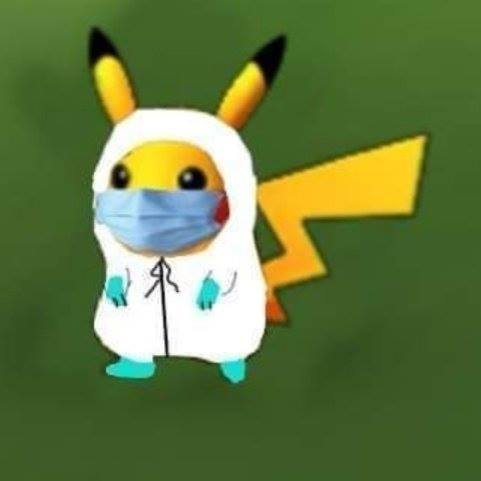ng](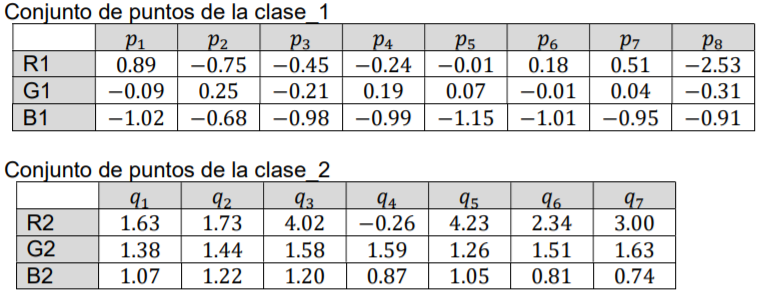)

In [1]:
import numpy as np

clase_1 = np.array([[0.89, -0.75, -0.45, -0.24, -0.01, 0.18, 0.51, -2.53],
                    [-0.09, 0.25, -0.21, 0.19, 0.07, -0.01, 0.04, -0.31],
                    [-1.02, -0.68, -0.98, -0.99, -1.15, -1.01, -0.95, -0.91]])
print(clase_1.shape)

clase_2 = np.array([[1.63, 1.73, 4.02, -0.26, 4.23, 2.34, 3.00],
                    [1.38, 1.44, 1.58, 1.59, 1.26, 1.51, 1.63],
                    [1.07, 1.22, 1.20, 0.87, 1.05, 0.81, 0.74]])

print(clase_2.shape)

(3, 8)
(3, 7)


## a)

Calcular la matriz de covarianza para cada clase. Deberás calcularlas usando las
fórmulas que están en las diapositivas 11 y 12 de la presentación que está en
Canvas: _01_RLS_2020_II.pdf_. Observa que el resultado deben ser dos matrices de
tamaño 3 × 3: la matriz de covarianza de lo datos de la clase_1 y la matriz de
covarianza de los datos de la clase_2.

---

$$Cov(x, y) = \frac{\sum_{k=1}^{n} (x_k - \bar{x}) (y_k - \bar{y})}{n - 1}$$



In [2]:
def cov_matrix(mat: np.ndarray) -> np.ndarray:
    m, n = mat.shape

    res = []

    for i in range(m):
        for j in range(m):
            mean_i = np.mean(mat[i])
            mean_j = np.mean(mat[j])

            x1 = mat[i] - mean_i

            x2 = mat[j] - mean_j

            cov = np.sum(x1 * x2) / (n - 1)

            res.append(cov)

    return np.array(res).reshape(m, m)

print(f"Clase 1:\n {cov_matrix(clase_1)}")
print(f"Clase 2:\n {cov_matrix(clase_2)}")

Clase 1:
 [[ 1.08402857  0.08035714 -0.0541    ]
 [ 0.08035714  0.03612679  0.00655893]
 [-0.0541      0.00655893  0.01778393]]
Clase 2:
 [[ 2.4087619  -0.0567881   0.06912857]
 [-0.0567881   0.0175619  -0.0109381 ]
 [ 0.06912857 -0.0109381   0.03602857]]


## b)
Investiga cómo se define la métrica o distancia de Mahalanobis y su uso para
calcular la distancia de un conjunto de puntos a un punto dado: escribe la fórmula y
da una breve explicación del uso de dicha métrica.

---

La distancia Mahalanobis (Mahalanobis, 1936) mide la distancia relativa a un centroide, que puede ser conceptualizado como la media de un conjunto de datos multivariables que intersectan. Entre más grande la distancia, más lejos se encuentra el punto del centroide. En otras palabras, mide cuántas desviaciones estándar se encuentra un punto _P_ de la media de una distribución _D_.

La distancia Mahalanobis tiene la propiedad de que es invariante con la escala, carece de unidades y además considera la correlación entre las variables.

Esta distancia es comúnmente usada para detectar _outliers_ en modelos de regresión linear, incluso en modelos multivariables.

Siendo $S$ la matriz de covarianza, se puede calcular de varias maneras:

1. Como la distancia entre dos puntos representados por los vectores $\vec{x}$ y $\vec{y}$.

$d_m(\vec{x}, \vec{y}) = \sqrt{(\vec{x} - \vec{y})^TS^{-1}(\vec{x} - \vec{y})}$

2. Como la distancia de un punto $\vec{x}$ a la media de la distribución $\mu$:

$d_m(\vec{x})=\sqrt{(\vec{x} - \mu)^T S^{-1}(\vec{x} - \mu)}$

Si los valores de los ejes son re-escalados para tener varianza unitaria, la distancia Mahalanobis corresponde a la distancia Euclidiana en este espacio transformado.

## c)

Calcula la distancia de Mahalanobis del punto 𝑃 al conjunto de puntos de la
clase_1.

In [ ]:
def mahalanobis(p: np.ndarray, matrix: np.ndarray):
    s = cov_matrix(matrix)
    
    s_inv = np.linalg.inv(s)

    feature_mean = np.mean(matrix, axis=1)

    distance_to_mean = p - feature_mean
    
    mahalanobis_sq = distance_to_mean.T.dot(s_inv).dot(distance_to_mean)

    return np.sqrt(mahalanobis_sq)    

p = np.array([-0.2, 1.3, 1.1])

print(f"Mahalanobis de P a Clase_1: {mahalanobis(p, clase_1)}")

Mahalanobis de P a Clase_1: 16.85200629540704


## d)
Calcula ahora la distancia de Mahalanobis del punto 𝑃 al conjunto de puntos de la
clase_2. 

In [ ]:
print(f"Mahalanobis de P a Clase_2: {mahalanobis(p, clase_2)}")

Mahalanobis de P a Clase_2: 2.5558693939151653


## e)
Con base a los resultados de los dos incisos anteriores, ¿a qué clase asignarías el
punto 𝑃?

---

Dado que la distancia de Mahalanobis de _P_ es menor a la _Clase_2_ es a esta clase a la que asignaría este punto.

## f)
Calcula ahora las distancias euclidiana del punto 𝑃 al punto medio de los datos de
la clase_1 y al punto medio de los datos de la clase_2. Con la distancia euclidiana,
¿a qué clase asignarías el punto 𝑃?

---

Dado que la distancia euclideana de P a la _Clase_1_ es menor, si se usara esta
distancia, el punto P se asignaría a ella, en contraste a lo obtenido usando 
distancia Mahalanobis.

In [ ]:
def euclidean(p: np.ndarray, matrix: np.ndarray):
    # Calculate the centroids
    feature_mean = np.mean(matrix, axis=1)

    return np.sqrt(np.sum(np.square(p - feature_mean)))

p = np.array([-0.2, 1.3, 1.1])

print(f"Euclidean de P a Clase_1: {euclidean(p, clase_1)}")
print(f"Euclidean de P a Clase_2: {euclidean(p, clase_2)}")

Euclidean de P a Clase_1: 2.4436812650180055
Euclidean de P a Clase_2: 2.593003931303441


## g)
Agrega tus conclusiones sobre cuál metrica convendría usar (la de Mahalanobis o
la euclidiana) en este ejercicio, justificando tu razonamiento. 

---
La distancia euclideana asume que las variables se encuentran distribuidas de manera que todas las variables son tratadas de la misma manera,es variante con la escala así que las distancias pueden sesgarse dependiendo de las unidades de las variables independientes. En contraste, la distancia Mahalanobis por definición posee invariancia de escala, no le importan las unidades de las variables y considera la correlación entre ellas, es decir, toma en cuenta qué tan relacionada está una variable con otra.

En este modelo en particular conviene usar Mahalanobis si sabemos que existirá una correlación de diferente grado en diferentes variables, por lo que el punto _P_ se asignará a la _Clase_2_.

# 3.

En la siguiente gráfica se indican 5 umbrales $𝑝_k$ para diferenciar entre datos de la
curva en la clase A positiva y datos de la curva en la clase B negativa. Asimismo, se
indica el porcentaje de área a la izquierda de cada curva en dichos puntos. Un dato
se considera en la clase A positiva, si el valor de su predicción es menor al valor del
umbral $𝑝_k$, en caso contrario se considera de la clase B negativa. En la Figura
cuadriculada dada más abajo y llamada Curva ROC, grafica los puntos
correspondientes asociados a cada uno de los umbrales $𝑝_k$ indicados en la imagen.
Con los puntos obtenidos aproxima la gráfica de la curva ROC. 

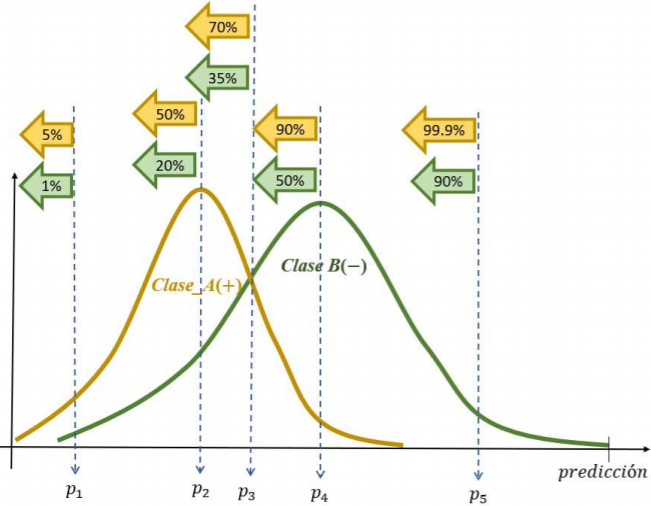

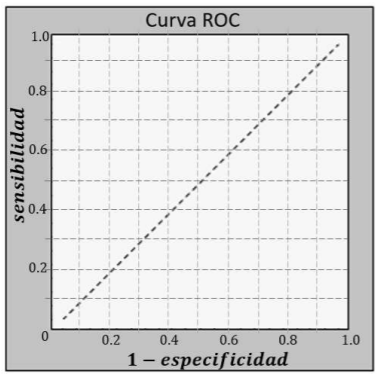

Dada la siguiente matriz de clases reales contra clases de predicción:

\\|A|B
--|--|--
A|VP|FP
B|FN|VN

Y las fórmulas:

$Sensibilidad = \frac{VP}{VP + FN}$

$Especificidad = \frac{VN}{VN + FP}$

$FPR = 1 - Especificidad = \frac{FP}{VN + FP}$

Se obtienen los siguientes datos:

## $p_1$
\\|A |B
--|--|--
 A|5 |1
 B|95|99

* VP = 5
* FP = 1
* FN = 95
* VN = 99

1. $Sensibilidad = \frac{5}{5 + 95} = 0.05$
2. $Especificidad = \frac{99}{99 + 1} = 0.99$
3. $FPR = 1 - Especificidad = \frac{1}{99 + 1} = 0.01$

## $p_2$
\\|A |B
--|--|--
 A|50|20
 B|50|80

* VP = 50
* FP = 20
* FN = 50
* VN = 80

1. $Sensibilidad = \frac{50}{50 + 50} = 0.5$
2. $Especificidad = \frac{80}{80 + 20} = 0.8$
3. $FPR = 1 - Especificidad = \frac{20}{80 + 20} = 0.2$

## $p_3$
\\|A |B
--|--|--
 A|70|35
 B|30|65

* VP = 70
* FP = 35
* FN = 30
* VN = 65

1. $Sensibilidad = \frac{70}{70 + 30} = 0.7$
2. $Especificidad = \frac{65}{65 + 35} = 0.65$
3. $FPR = 1 - Especificidad = \frac{35}{65 + 35} = 0.35$

## $p_4$
\\|A |B
--|--|--
 A|90|50
 B|10|50

* VP = 90
* FP = 50
* FN = 10
* VN = 50

1. $Sensibilidad = \frac{90}{90 + 10} = 0.9$
2. $Especificidad = \frac{50}{50 + 50} = 0.5$
3. $FPR = 1 - Especificidad = \frac{50}{50 + 50} = 0.5$

## $p_5$
\\|A |B
--|--|--
 A|99.9|90
 B|0.1|10

* VP = 99.9
* FP = 90
* FN = 0.1
* VN = 10

1. $Sensibilidad = \frac{99.9}{99.9 + 0.1} = 0.999$
2. $Especificidad = \frac{10}{10 + 90} = 0.1$
3. $FPR = 1 - Especificidad = \frac{90}{10 + 90} = 0.9$

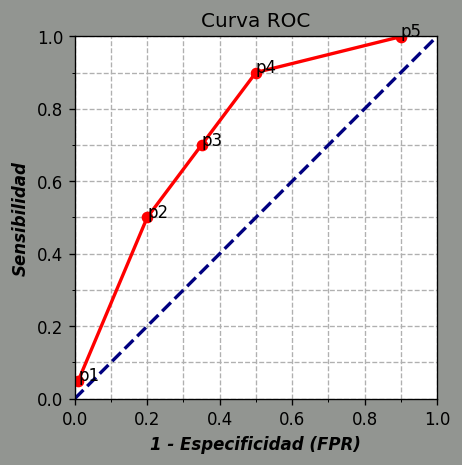

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

def draw_roc(fpr, tpr):

    # Set size and color of plot
    fig = plt.figure(dpi=120)
    fig.patch.set_facecolor('xkcd:gray')
    line_width = 2
    
    # Paint each pair of points
    plt.plot(fpr, tpr, color='red',
            lw=line_width,
            marker="o")
    
    # Add a nice label for each marker
    for i,xy in enumerate(zip(fpr, tpr)):
        plt.annotate(f"p{i + 1}", xy=xy, textcoords='data')

    plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # Labels and titles
    plt.title('Curva ROC')
    plt.xlabel('1 - Especificidad (FPR)',
               fontweight="bold",
               fontstyle="italic")
    plt.ylabel('Sensibilidad',
               fontweight="bold",
               fontstyle="italic")

    
    # Create the grid with appropriate spacing
    ax = plt.gca()
    spacing = 0.1
    minorLocator = MultipleLocator(spacing)
    
    ax.xaxis.set_minor_locator(minorLocator)
    ax.yaxis.set_minor_locator(minorLocator)

    ax.grid(which="both", ls="--")
    ax.set_aspect("equal")

    plt.show()

# Codificamos los resultados obtenidos anteriormente
sensibilidades = [0.05, 0.5, 0.7, 0.9, 0.999]
fprs = [0.01, 0.2, 0.35, 0.5, 0.9]
draw_roc(fprs, sensibilidades)